1/19/2018 ML Project(Updated) (1)
Predicting players rating
In this project you are going to predict the overall rating of soccer player based on their 
attributes such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more 
than 10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment
About the Dataset
The ultimate Soccer database for data analysis and 
machine learning
The dataset comes in the form of an SQL database and contains statistics of about 25,000 football 
matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 
2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team 
formations, with player names and a pair of coordinates to indicate their position on the pitch.
+25,000 matches
+10,000 players
11 European Countries with their lead championship
Seasons 2008 to 2016
Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including 
the weekly updates
Team line up with squad formation (X, Y coordinates)
Betting odds from up to 10 providers
Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for 
+10,000 matches
The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA 
video games. It is not just the stats that come with a new version of the game but also the weekly 
updates. So for instance if a player has performed poorly over a period of time and his stats get 
impacted in FIFA, you would normally see the same in the dataset.
Python skills required to complete this project
SQL:
The data is in SQL database so students need to retrive using query language. They also need 
to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'.
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 1/4
1/19/2018 ML Project(Updated) (1)
SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. 
It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. 
You do not need to install this module separately because it is shipped by default along with Python 
version 2.5.x onwards.
To use sqlite3 module, you must first create a connection object that represents the database 
and then optionally you can create a cursor object, which will help you in executing all the SQL 
statements.
Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use 
data structures and data analysis tools for the Python programming language. Python with 
Pandas is used in a wide range of fields including academic and commercial domains including 
finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of 
Python Pandas and how to use them in practice.
Scikit Learn
Scikit-learn provides a range of supervised and unsupervised learning algorithms via a 
consistent interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can 
use scikit-learn. This stack that includes:
NumPy: Base n-dimensional array package
SciPy: Fundamental library for scientific computing
Matplotlib: Comprehensive 2D/3D plotting
IPython: Enhanced interactive console
Sympy: Symbolic mathematics
Pandas: Data structures and analysis
Extensions or modules for SciPy care conventionally named SciKits. As such, the module 
provides learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems. 
This means a deep focus on concerns such as easy of use, code quality, collaboration, 
documentation and performance.
Machine Learning skills required to complete the 
project
Supervised learning
Supervised learning deals with learning a function from available training data. A supervised 
learning algorithm analyzes the training data and produces an inferred function, which can be 
used for mapping new examples.
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4
1/19/2018 ML Project(Updated) (1)
Regression
Regression is a parametric technique used to predict continuous (dependent) variable given a set 
of independent variables. It is parametric in nature because it makes certain assumptions 
(discussed next) based on the data set. If the data set follows those assumptions, regression gives 
incredible results.
Model evaluation
Student must know how to judge a model on unseen data. What metric to select to judge 
the performance
Let's get started.....
Import Libraries
In [1]: import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor from 
sklearn.linear_model import LinearRegression from 
sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error from 
math import sqrt
Read Data from the Database into pandas
In [2]: # Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 3/4
1/19/2018 ML Project(Updated) (1)
In [3]: df.head()
Out[3]: id player_fifa_api_id player_api_id date overall_rating potential preferred_foot attacking_
0
2016-
1 218353 505942 02-18 67.0 71.0 right
00:00:00
1
2015-
2 218353 505942 11-19 67.0 71.0 right
00:00:00
2
2015-
3 218353 505942 09-21 62.0 66.0 right
00:00:00
3
2015-
4 218353 505942 03-20 61.0 65.0 right
00:00:00
4
2007-
5 218353 505942 02-22 61.0 65.0 right
00:00:00
5 rows × 42 columns
In [ ]:
http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 4/4
3. Output
This project consists of 3000 marks and has to be submitted 
in .ipynb/PDF format in the upcoming session for evaluationimport sqlite3


In [1]:
import sqlite3
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

import pickle

In [2]:
cnx = sqlite3.connect('database.sqlite')

In [3]:
df= pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
target = df.pop('overall_rating')  # creating target variable

In [6]:
df.shape

(183978, 41)

In [7]:
target.shape

(183978,)

In [8]:
target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [9]:
# finding null values from target

target.isnull().values.sum()

836

In [10]:
target.describe()

count    183142.000000
mean         68.600015
std           7.041139
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

<IPython.core.display.Javascript object>


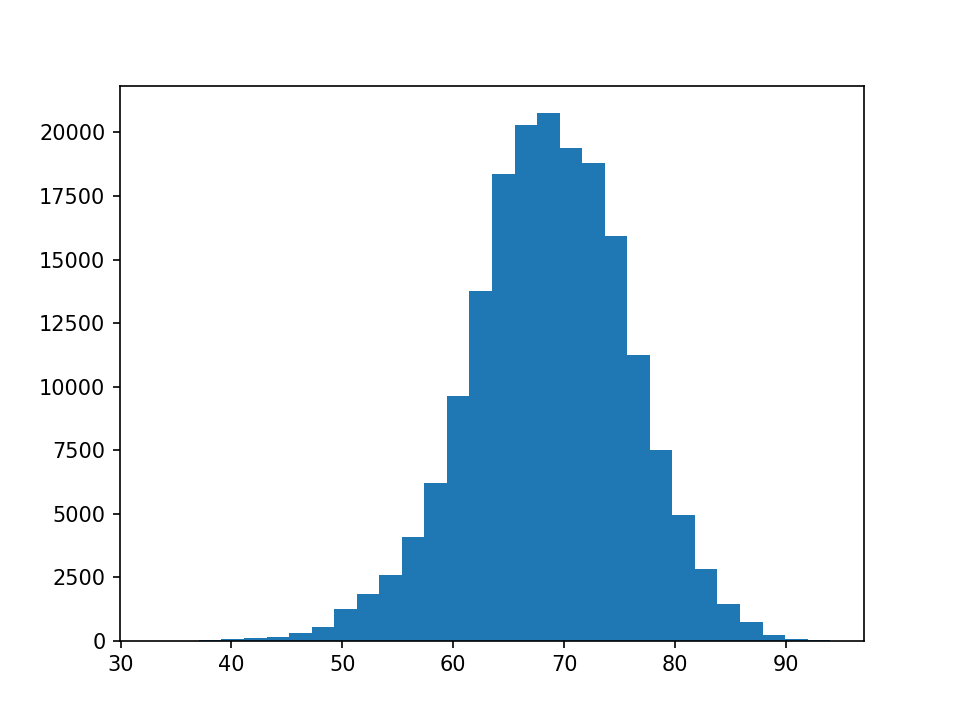

(array([7.0000e+00, 6.0000e+00, 2.0000e+01, 6.5000e+01, 9.4000e+01,
        1.4200e+02, 2.9400e+02, 5.2600e+02, 1.2510e+03, 1.8450e+03,
        2.5780e+03, 4.0870e+03, 6.1890e+03, 9.6500e+03, 1.3745e+04,
        1.8366e+04, 2.0310e+04, 2.0773e+04, 1.9382e+04, 1.8784e+04,
        1.5915e+04, 1.1254e+04, 7.5250e+03, 4.9470e+03, 2.8290e+03,
        1.4590e+03, 7.4800e+02, 2.2800e+02, 8.4000e+01, 3.9000e+01]),
 array([33.        , 35.03333333, 37.06666667, 39.1       , 41.13333333,
        43.16666667, 45.2       , 47.23333333, 49.26666667, 51.3       ,
        53.33333333, 55.36666667, 57.4       , 59.43333333, 61.46666667,
        63.5       , 65.53333333, 67.56666667, 69.6       , 71.63333333,
        73.66666667, 75.7       , 77.73333333, 79.76666667, 81.8       ,
        83.83333333, 85.86666667, 87.9       , 89.93333333, 91.96666667,
        94.        ]),
 <BarContainer object of 30 artists>)

In [11]:
plt.hist(target, 30, range=(33, 94))

In [12]:
y = target.fillna(target.mean())

In [13]:
y.isnull().values.any()

False

In [14]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'potential',
       'preferred_foot', 'attacking_work_rate', 'defensive_work_rate',
       'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'],
      dtype='object')

In [15]:
for col in df.columns:
    unique_cat = len(df[col].unique())
    print("{col}--> {unique_cat}..{typ}".format(col=col, unique_cat=unique_cat, typ=df[col].dtype))

id--> 183978..int64
player_fifa_api_id--> 11062..int64
player_api_id--> 11060..int64
date--> 197..object
potential--> 57..float64
preferred_foot--> 3..object
attacking_work_rate--> 9..object
defensive_work_rate--> 20..object
crossing--> 96..float64
finishing--> 98..float64
heading_accuracy--> 97..float64
short_passing--> 96..float64
volleys--> 94..float64
dribbling--> 98..float64
curve--> 93..float64
free_kick_accuracy--> 98..float64
long_passing--> 96..float64
ball_control--> 94..float64
acceleration--> 87..float64
sprint_speed--> 86..float64
agility--> 82..float64
reactions--> 79..float64
balance--> 82..float64
shot_power--> 97..float64
jumping--> 80..float64
stamina--> 85..float64
strength--> 83..float64
long_shots--> 97..float64
aggression--> 92..float64
interceptions--> 97..float64
positioning--> 96..float64
vision--> 98..float64
penalties--> 95..float64
marking--> 96..float64
standing_tackle--> 96..float64
sliding_tackle--> 95..float64
gk_diving--> 94..float64
gk_handling--> 91..

In [16]:
# Categorical to numerical in certain columns

dummy_df = pd.get_dummies(df, columns=['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])
dummy_df.head()

,id,player_fifa_api_id,player_api_id,date,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,defensive_work_rate_9,defensive_work_rate__0,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,1,218353,505942,2016-02-18 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
1,2,218353,505942,2015-11-19 00:00:00,71.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
2,3,218353,505942,2015-09-21 00:00:00,66.0,49.0,44.0,71.0,61.0,44.0,...,0,0,0,0,0,0,1,0,0,0
3,4,218353,505942,2015-03-20 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0
4,5,218353,505942,2007-02-22 00:00:00,65.0,48.0,43.0,70.0,60.0,43.0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
X = dummy_df.drop(['id', 'date'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Imputing null value of each column with the mean of that column
imput = SimpleImputer()
X_train = imput.fit_transform(X_train)
X_test = imput.fit_transform(X_test)

In [20]:
# Finding feature_importance for feature selection. from it we'll be able to decide threshold value
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

[8.29926878e-03 8.76651891e-03 1.38380304e-01 1.50917601e-02
 8.96754395e-03 2.65084952e-02 2.32148431e-02 2.11464916e-03
 1.21002207e-02 1.15588342e-03 9.07089794e-04 3.46187875e-03
 6.23258986e-02 3.50267859e-03 5.06886467e-03 1.57388602e-03
 3.40392470e-01 1.12021936e-03 2.63976529e-02 2.09015817e-03
 5.34649426e-03 1.99538041e-02 2.90801725e-03 3.63725610e-03
 1.08029805e-02 1.59304906e-02 2.15862039e-03 1.20606134e-03
 2.70922109e-02 4.80036177e-02 5.21030976e-03 3.61375287e-02
 2.63463128e-02 4.56153648e-03 5.31641878e-02 2.52356995e-02
 6.61703874e-04 8.43935588e-04 7.67433201e-04 5.43107337e-04
 1.34665193e-03 0.00000000e+00 9.30955226e-04 2.22283276e-03
 7.73709558e-04 4.00525896e-04 3.51874187e-04 9.13819880e-04
 0.00000000e+00 1.48726173e-03 7.02726829e-04 8.02693132e-04
 1.85659854e-03 0.00000000e+00 3.65989370e-04 0.00000000e+00
 7.54972512e-04 0.00000000e+00 0.00000000e+00 1.71019183e-03
 3.09791096e-04 9.43273713e-04 2.17451388e-03 0.00000000e+00
 0.00000000e+00]


In [21]:
selection = SelectFromModel(model, threshold=0.01, prefit=True)

select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
select_X_train.shape

(147182, 17)

In [22]:
scalar = StandardScaler()
x_scaled_train = scalar.fit_transform(select_X_train)
x_scaled_train

array([[ 0.0816175 ,  0.22586867, -0.20056302, ..., -0.50890987,
        -0.19438894, -0.25857333],
       [-0.67880702,  0.51645163, -0.38289661, ..., -0.19268855,
        -0.13201962, -0.49209458],
       [ 0.68995711, -0.87834656,  1.50121723, ...,  0.31326556,
         0.30456557,  0.2668495 ],
       ...,
       [ 1.29829672,  1.3300839 ,  0.71110497, ...,  0.31326556,
         0.30456557,  0.2668495 ],
       [ 0.99412691, -0.70399679,  0.28565991, ...,  0.37650982,
         0.36693488,  0.32522981],
       [ 1.75455142, -0.70399679,  1.44043936, ..., -0.69864265,
        -0.5062355 , -0.25857333]])

In [23]:
x_scaled_test = scalar.fit_transform(select_X_test)
x_scaled_test

array([[ 1.14675836,  0.69935521, -1.95409067, ..., -0.69967421,
        -0.19741836, -0.08627724],
       [-0.21994858,  0.46661796, -0.19038391, ..., -0.63681659,
        -0.19741836, -0.20203077],
       [-0.52366123,  0.75753953,  0.05288599, ..., -0.51110136,
        -0.01197896, -0.37566105],
       ...,
       [-1.73851184,  0.46661796, -0.55528876, ...,  0.24319002,
         0.23527357,  0.20310657],
       [-0.97923021,  0.23388071,  0.23533841, ..., -0.38538613,
        -0.38285776, -0.25990753],
       [ 1.90603999,  0.40843365,  0.9651481 , ..., -0.57395898,
        -0.0737921 , -0.37566105]])

In [24]:
# Linear Regression

linear_reg = LinearRegression()
linear_reg.fit(x_scaled_train, y_train)

LinearRegression()

In [25]:
linear_reg.score(x_scaled_test, y_test)

0.8337959255632099

In [26]:
cv = ShuffleSplit(random_state=42)   

param_grid = {'n_jobs': [-1]}    
grid = GridSearchCV(linear_reg, param_grid=param_grid, cv=cv)

In [27]:
grid.fit(select_X_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=LinearRegression(), param_grid={'n_jobs': [-1]})

In [28]:
grid.best_params_

{'n_jobs': -1}

In [29]:
grid.best_estimator_

LinearRegression(n_jobs=-1)

In [31]:
new_linear_reg = LinearRegression(n_jobs=-1)
new_linear_reg.fit(x_scaled_train, y_train)

LinearRegression(n_jobs=-1)

In [32]:
new_linear_reg.score(x_scaled_test, y_test)

0.8337959255632099

In [33]:
# Decision Tree

decision_tree = DecisionTreeRegressor(criterion='squared_error', random_state=42)       
decision_tree.fit(x_scaled_train, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
cv = ShuffleSplit(n_splits=10, random_state=42)        
param_grid = {'max_depth': [3, 5, 7, 9, 13],
             'criterion': ['squared_error', 'friedman_mse']}

grid = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv)

In [35]:
grid.fit(select_X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=None, train_size=None),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [3, 5, 7, 9, 13]})

In [36]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 13}

In [37]:
grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=42)

In [38]:
new_dtree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=13,random_state=42)
new_dtree.fit(x_scaled_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=13, random_state=42)

In [39]:
new_dtree.score(x_scaled_test, y_test)

0.9304462965593071

In [40]:
# Random Forest Regressor 

random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
random_forest.score(x_scaled_test, y_test)

0.9801078869711486

In [43]:
cv = ShuffleSplit(test_size=0.2, random_state=42)

param_grid = {'max_features':['sqrt', 'log2', 10],
              'max_depth':[9, 11, 13]}                 

grid = GridSearchCV(random_forest, param_grid=param_grid, cv=cv)

In [44]:
grid.fit(x_scaled_train, y_train) 

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [9, 11, 13],
                         'max_features': ['sqrt', 'log2', 10]})

In [45]:
grid.best_estimator_

RandomForestRegressor(max_depth=13, max_features='sqrt', random_state=42)

In [46]:
new_random_forest = RandomForestRegressor(max_depth=13, max_features='sqrt', random_state=42)
new_random_forest.fit(x_scaled_train, y_train)

RandomForestRegressor(max_depth=13, max_features='sqrt', random_state=42)

In [47]:
new_random_forest.score(x_scaled_test, y_test)

0.9586349571457373

In [48]:
# XGBOOST Regressor

xgr = XGBRegressor(random_state=42)
xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
xgr.score(x_scaled_test, y_test)

C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9599715534960364

In [50]:
cv = ShuffleSplit(n_splits=10, random_state=0)

param_grid = {'max_depth': [5, 7],
              'learning_rate': [0.1, 0.3]}

grid = GridSearchCV(xgr, param_grid=param_grid, cv=cv, n_jobs= -1)

In [51]:
grid.fit(x_scaled_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=None, train_size=None),
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=42,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate

In [52]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
new_xgr = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
new_xgr.fit(x_scaled_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
new_xgr.score(x_scaled_test, y_test)

C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


0.9642417265601259

In [56]:
print("""Linear Regressor accuracy is {lin}
DecisionTree Regressor accuracy is {Dec}
RandomForest regressor accuracy is {ran}
XGBoost regressor accuracy is {xgb}""".format(lin=new_linear_reg.score(x_scaled_test, y_test),
                                                       Dec=new_dtree.score(x_scaled_test, y_test),
                                                       ran=new_random_forest.score(x_scaled_test, y_test),
                                                       xgb=new_xgr.score(x_scaled_test, y_test)))

Linear Regressor accuracy is 0.8337959255632099
DecisionTree Regressor accuracy is 0.9304462965593071
RandomForest regressor accuracy is 0.9586349571457373
XGBoost regressor accuracy is 0.9642417265601259


C:\Users\amits\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
XGBOOST regressor gave highest accuracy.